In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize


In [2]:
weoemissions = pd.read_csv(r'C:\Users\Rosemary Akamagwuna\Desktop\Artificial Intelligence\WORLD ENERGY OUTLOOK 2021\DATA SETS\WEO2021_Free_Data_World.csv')
print(weoemissions.head())


                 Publication                  Scenario Region Category  \
0  World Energy Outlook 2021  Stated Policies Scenario  World   Energy   
1  World Energy Outlook 2021  Stated Policies Scenario  World   Energy   
2  World Energy Outlook 2021  Stated Policies Scenario  World   Energy   
3  World Energy Outlook 2021  Stated Policies Scenario  World   Energy   
4  World Energy Outlook 2021  Stated Policies Scenario  World   Energy   

  Product                         Flow Unit  Year  Value  
0   Total  Total primary energy demand   EJ  2010  544.7  
1   Total  Total primary energy demand   EJ  2019  613.0  
2   Total  Total primary energy demand   EJ  2020  589.1  
3   Total  Total primary energy demand   EJ  2030  671.0  
4   Total  Total primary energy demand   EJ  2040  714.8  


In [3]:
weoemissions.isna().any()

Publication    False
Scenario       False
Region         False
Category       False
Product        False
Flow           False
Unit           False
Year           False
Value          False
dtype: bool

In [4]:
weoemissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Publication  2550 non-null   object 
 1   Scenario     2550 non-null   object 
 2   Region       2550 non-null   object 
 3   Category     2550 non-null   object 
 4   Product      2550 non-null   object 
 5   Flow         2550 non-null   object 
 6   Unit         2550 non-null   object 
 7   Year         2550 non-null   int64  
 8   Value        2550 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 179.4+ KB


In [5]:
weoemissions.loc[:,['Flow']]

,Flow
0,Total primary energy demand
1,Total primary energy demand
2,Total primary energy demand
3,Total primary energy demand
4,Total primary energy demand
...,...
2545,Total all sectors
2546,Total all sectors
2547,Total all sectors
2548,Total all sectors


In [6]:
e_demand = weoemissions[(weoemissions['Flow'] == 'Total primary energy demand') & (weoemissions['Category']=='Energy')]
energy_demand = e_demand.iloc[:, [1, 3, 4, 5, 7, 8]]
print(energy_demand.head())

                   Scenario Category Product                         Flow  \
0  Stated Policies Scenario   Energy   Total  Total primary energy demand   
1  Stated Policies Scenario   Energy   Total  Total primary energy demand   
2  Stated Policies Scenario   Energy   Total  Total primary energy demand   
3  Stated Policies Scenario   Energy   Total  Total primary energy demand   
4  Stated Policies Scenario   Energy   Total  Total primary energy demand   

   Year  Value  
0  2010  544.7  
1  2019  613.0  
2  2020  589.1  
3  2030  671.0  
4  2040  714.8  


Dummy Project - Analyzing the several scenarios for total energy demand


                   Scenario Category Product                         Flow  \
0  Stated Policies Scenario   Energy   Total  Total primary energy demand   
1  Stated Policies Scenario   Energy   Total  Total primary energy demand   
2  Stated Policies Scenario   Energy   Total  Total primary energy demand   
3  Stated Policies Scenario   Energy   Total  Total primary energy demand   
4  Stated Policies Scenario   Energy   Total  Total primary energy demand   
5  Stated Policies Scenario   Energy   Total  Total primary energy demand   

   Year  Value  
0  2010  544.7  
1  2019  613.0  
2  2020  589.1  
3  2030  671.0  
4  2040  714.8  
5  2050  743.9  


<AxesSubplot:title={'center':'World Total Enegy Demand - NZE '}, xlabel='Year', ylabel='EJ'>

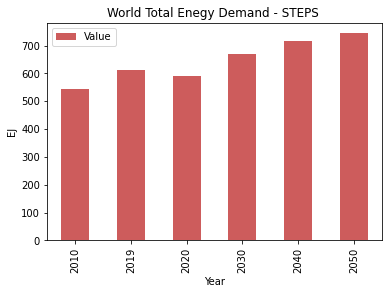

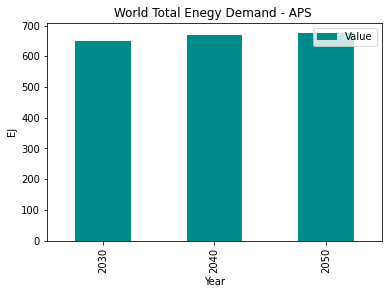

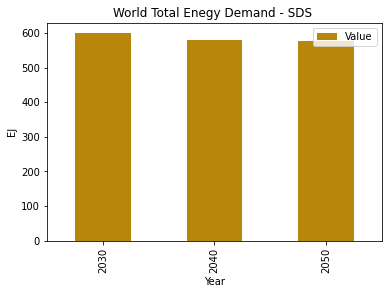

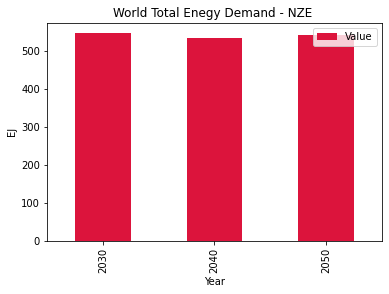

In [7]:
T_STEPS = energy_demand[(energy_demand['Scenario'] == 'Stated Policies Scenario') & (energy_demand['Product'] == 'Total')]
T_APS = energy_demand[(energy_demand['Scenario'] == 'Announced Pledges Scenario') & (energy_demand['Product'] == 'Total')]
T_SDS = energy_demand[(energy_demand['Scenario'] == 'Sustainable Development Scenario') & (energy_demand['Product'] == 'Total')]
T_NZE = energy_demand[(energy_demand['Scenario'] == 'Net Zero Emissions by 2050 Scenario') & (
    energy_demand['Product'] == 'Total')]
print(T_STEPS)
#colors = ['r','g','b','y']
#for i in range(4):
    #T_STEPS.plot(x='Year', y='Value', kind='bar', title='World Total Enegy Demand - STEPS ',xlabel='Year', ylabel='EJ', color=colors[i])

T_STEPS.plot(x='Year', y='Value', kind='bar', title='World Total Enegy Demand - STEPS ',
             xlabel='Year', ylabel='EJ', color='indianred')
T_APS.plot(x='Year', y='Value', kind='bar', title='World Total Enegy Demand - APS ',
             xlabel='Year', ylabel='EJ', color='darkcyan')
T_SDS.plot(x='Year', y='Value', kind='bar', title='World Total Enegy Demand - SDS ',
             xlabel='Year', ylabel='EJ', color='darkgoldenrod')

T_NZE.plot(x='Year', y='Value', kind='bar', title='World Total Enegy Demand - NZE ',
             xlabel='Year', ylabel='EJ', color='crimson')



Global Energy Demand Mix for 2030, 2040 and 2050 - Project 1 

C:\Users\ROSEMA~1\AppData\Local\Temp/ipykernel_2072/3195816854.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(a,rotation=15)


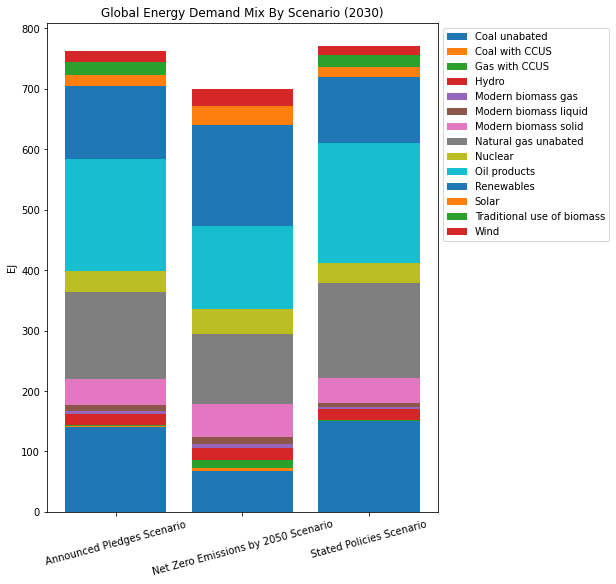

In [10]:
#PHASE ONE- This part of the project involves analyzing the STEPS, NZE and APS scenarios for the global energy demand mix for year 2030.
#STEPS
# 1. Defining the relevant rows and columns from the dataset
ep_demand = weoemissions[(weoemissions['Flow'] == 'Total primary energy demand') & (
    weoemissions['Category'] == 'Energy')]
energydemand_byp = ep_demand.iloc[:, [1, 3, 4, 5, 7, 8]]

# 2. confirming that there are no negative values in this dataset
energydemand_byp['Value'].value_counts().sum()
neg= energydemand_byp['Value']< 0
neg.sum()

# 3. Extracting data by year and scenarios for all product categories except "total"

# Tried to write a function for this but it failed :(
# def yearScenes(x): 
# energydemand_byp[(energydemand_byp['Year'] == x) & (energydemand_byp['Product'] != 'Total') & (energydemand_byp['Scenario'].isin(['Stated Policies Scenario','Announced Pledges Scenario','Sustainable Development Scenario','Net Zero Emissions by 2050 Scenario']))]

energyyearScenes2030 = energydemand_byp[(energydemand_byp['Year'] == 2030) & (energydemand_byp['Product'] != 'Total') & (energydemand_byp['Scenario'].isin(['Stated Policies Scenario','Announced Pledges Scenario', 'Net Zero Emissions by 2050 Scenario']))]

# 4. the need to figure out how to manipulate the data to make every product a column and the scenarios remain the index, to facilitate plotting the stacked bar chart. Pivot tables came to the rescue!

plt2030demand = energyyearScenes2030.pivot_table('Value',['Scenario'],'Product')
#print(plt2030demand)

# 5. time to plot!
# Added a function to encourage reusability
def plot_bars(axes,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,ylabel):
    axes.bar(a,b, label='Coal unabated')
    axes.bar(a,c, bottom = b, label='Coal with CCUS')
    axes.bar(a,d, bottom = b + c, label= 'Gas with CCUS')
    axes.bar(a,e, bottom = b + c + d, label='Hydro')
    axes.bar(a,f, bottom = b + c + d + e, label = 'Modern biomass gas')
    axes.bar(a,g, bottom = b + c + d + e + f, label = 'Modern biomass liquid')
    axes.bar(a, h, bottom=b + c + d + e + f + g, label='Modern biomass solid')
    axes.bar(a, i, bottom=b + c + d + e + f +
             g + h, label='Natural gas unabated')
    axes.bar(a,j, bottom = b + c + d + e + f + g + h + i, label='Nuclear')
    axes.bar(a, k, bottom=b + c + d + e + f +
             g + h + i + j, label='Oil products')
    axes.bar(a, l, bottom=b + c + d + e + f +
             g + h + i + j + k, label='Renewables')
    axes.bar(a,m, bottom = b + c + d + e + f + g + h + i + j + k + l, label = 'Solar')
    axes.bar(a, n, bottom = b + c + d + e + f + g + h + i + j + k + l + m, label='Traditional use of biomass')
    axes.bar(a, o, bottom=b + c + d + e + f + g + h + i + j + k + l + m + n, label = 'Wind')
    axes.set_xticklabels(a,rotation=15)
    axes.set_ylabel(ylabel)

#Calling the function
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (7, 9) #to adjust the size of the plot
plot_bars(ax, plt2030demand.index,plt2030demand['Coal unabated'],
          plt2030demand['Coal with CCUS'], plt2030demand['Gas with CCUS'], plt2030demand['Hydro'], plt2030demand['Modern biomass gas'], plt2030demand['Modern biomass liquid'], plt2030demand['Modern biomass solid'], plt2030demand['Natural gas unabated'], plt2030demand['Nuclear'], plt2030demand['Oil products'], plt2030demand['Renewables'], plt2030demand['Solar'],plt2030demand['Traditional use of biomass'],plt2030demand['Wind'],'EJ')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title('Global Energy Demand Mix By Scenario (2030)')
plt.show()



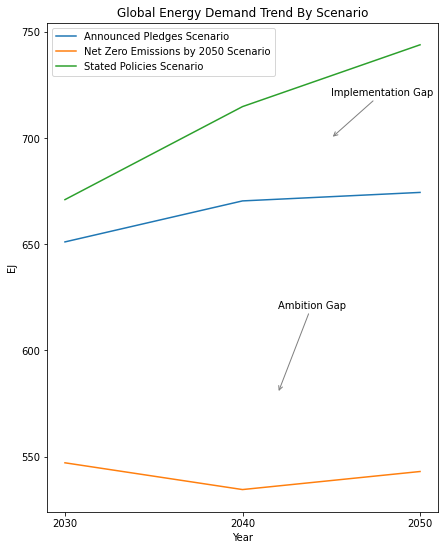

In [9]:
#PHASE TWO - This part of the project involves comparing the different scenarios of energy demand and assessing the ambition and implementation gaps
# 1. subsetting to compare energy demand by year and scenario
energyScenesdecades = energydemand_byp[(energydemand_byp['Year'].isin([2030, 2040, 2050])) & (
    energydemand_byp['Product'] == 'Total') & (energydemand_byp['Scenario'] != 'Sustainable Development Scenario')].set_index('Year')

# 2. plot code for the line plot comparing scenarios by energy demand
scenario_set = set(energyScenesdecades['Scenario'])

plt.figure()
for Scenario in scenario_set:
    selected_data = energyScenesdecades.loc[energyScenesdecades['Scenario'] == Scenario]
    plt.plot(selected_data.index, selected_data['Value'], label=Scenario)
plt.title('Global Energy Demand Trend By Scenario')
plt.xlabel('Year')
plt.ylabel('EJ')
plt.gca().set_xticks(selected_data.index.unique())
plt.annotate('Implementation Gap', xy=(2045,700), xytext=(2045, 720), 
            arrowprops={'arrowstyle':'->','color':'gray'})
plt.annotate('Ambition Gap', xy=(2042, 580), xytext=(2042, 620),
             arrowprops={'arrowstyle': '->', 'color': 'gray'})
#plt.locator_params(integer=True)
plt.legend()
plt.show()
